Визуализация активации в свёрточных нейронных сетях на примере распознавания чисел из датасета MNIST.
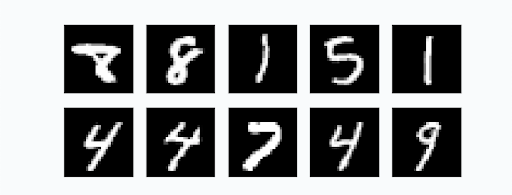

Визуализируем активации с помощью утилиты `keract`.

In [ ]:
!pip install keract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, MaxPool2D
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from tensorflow.keras import activations
from keract import get_activations, display_activations

In [ ]:
# Различные константы
IMG_WIDTH, IMG_HEIGHT = 28, 28
BATCH_SIZE = 250
EPOCHS = 25
NUM_CLASSES = 10
VALIDATION_SPLIT = 0.2
VERBOSITY = 1

In [ ]:
# Загружаем датасет MNIST.
(input_train, target_train), (input_test, target_test) = mnist.load_data()

In [ ]:
print(input_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
print(type(input_train))

<class 'numpy.ndarray'>


In [ ]:
print(input_train.shape)

(60000, 28, 28)


In [ ]:
# Подготавливаем данные.
input_train = input_train.reshape(input_train.shape[0], IMG_WIDTH, IMG_HEIGHT, 1)
input_test = input_test.reshape(input_test.shape[0], IMG_WIDTH, IMG_HEIGHT, 1)
input_shape = (IMG_WIDTH, IMG_HEIGHT, 1)

In [ ]:
print(input_train.shape)

(60000, 28, 28, 1)


In [ ]:
print(input_train[0])

[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]


In [ ]:
# Нормализуем данные (0-255 -> 0-1.0).
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')
input_train = input_train / 255
input_test = input_test / 255

target_train = tensorflow.keras.utils.to_categorical(target_train, NUM_CLASSES)
target_test = tensorflow.keras.utils.to_categorical(target_test, NUM_CLASSES)

In [ ]:
print(target_train[0])

In [ ]:
print(type(target_train))

<class 'numpy.ndarray'>


In [ ]:
# Либо загружаем обученную модель.
#model = load_model("cnn_mnist_classification")

In [ ]:
# Либо создаём модель.
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape, padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', padding="same"))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [ ]:
# И обучаем её.
model.compile(
    loss=tensorflow.keras.losses.categorical_crossentropy,
    optimizer=tensorflow.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# callback для сохранения результатов обучения в формате Keras (h5) после каждой эпохи обучения.
callbacks = [
    tensorflow.keras.callbacks.ModelCheckpoint("drive/MyDrive/3_classification_keras_mnist_deep_dive/cnn_mnist_classification_epochs/epoch_{epoch}.h5")
]

model.fit(
    input_train,
    target_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=callbacks,
    verbose=VERBOSITY,
    validation_split=VALIDATION_SPLIT
)

Epoch 1/25
192/192 [==============================] - 3s 7ms/step - loss: 0.3765 - accuracy: 0.8923 - val_loss: 0.1601 - val_accuracy: 0.9517
Epoch 2/25
192/192 [==============================] - 1s 7ms/step - loss: 0.1181 - accuracy: 0.9645 - val_loss: 0.0951 - val_accuracy: 0.9719
Epoch 3/25
192/192 [==============================] - 1s 6ms/step - loss: 0.0770 - accuracy: 0.9774 - val_loss: 0.0741 - val_accuracy: 0.9784
Epoch 4/25
192/192 [==============================] - 1s 5ms/step - loss: 0.0585 - accuracy: 0.9816 - val_loss: 0.0653 - val_accuracy: 0.9803
Epoch 5/25
192/192 [==============================] - 1s 7ms/step - loss: 0.0456 - accuracy: 0.9864 - val_loss: 0.0618 - val_accuracy: 0.9812
Epoch 6/25
192/192 [==============================] - 2s 8ms/step - loss: 0.0377 - accuracy: 0.9884 - val_loss: 0.0621 - val_accuracy: 0.9824
Epoch 7/25
192/192 [==============================] - 2s 8ms/step - loss: 0.0297 - accuracy: 0.9910 - val_loss: 0.0625 - val_accuracy: 0.9830
Epoch 

In [ ]:
model.load_weights('drive/MyDrive/3_classification_keras_mnist_deep_dive/cnn_mnist_classification_epochs/epoch_24.h5')

In [ ]:
# Сохраняем модель.
model.save("drive/MyDrive/3_classification_keras_mnist_deep_dive/cnn_mnist_classification")

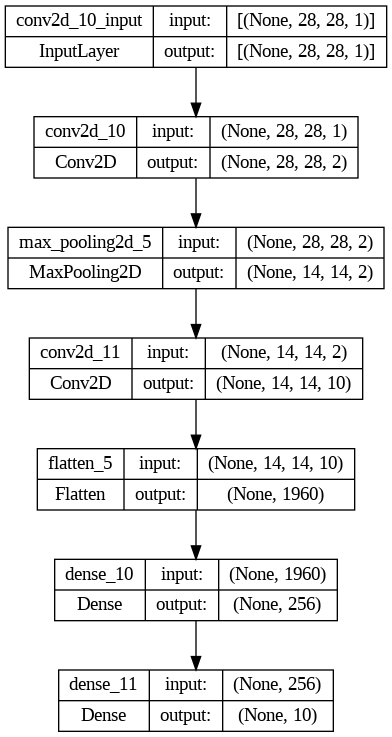

In [ ]:
# Визуализируем модель.
plot_model(model, show_shapes = True)

conv2d_10_input (1, 28, 28, 1) 


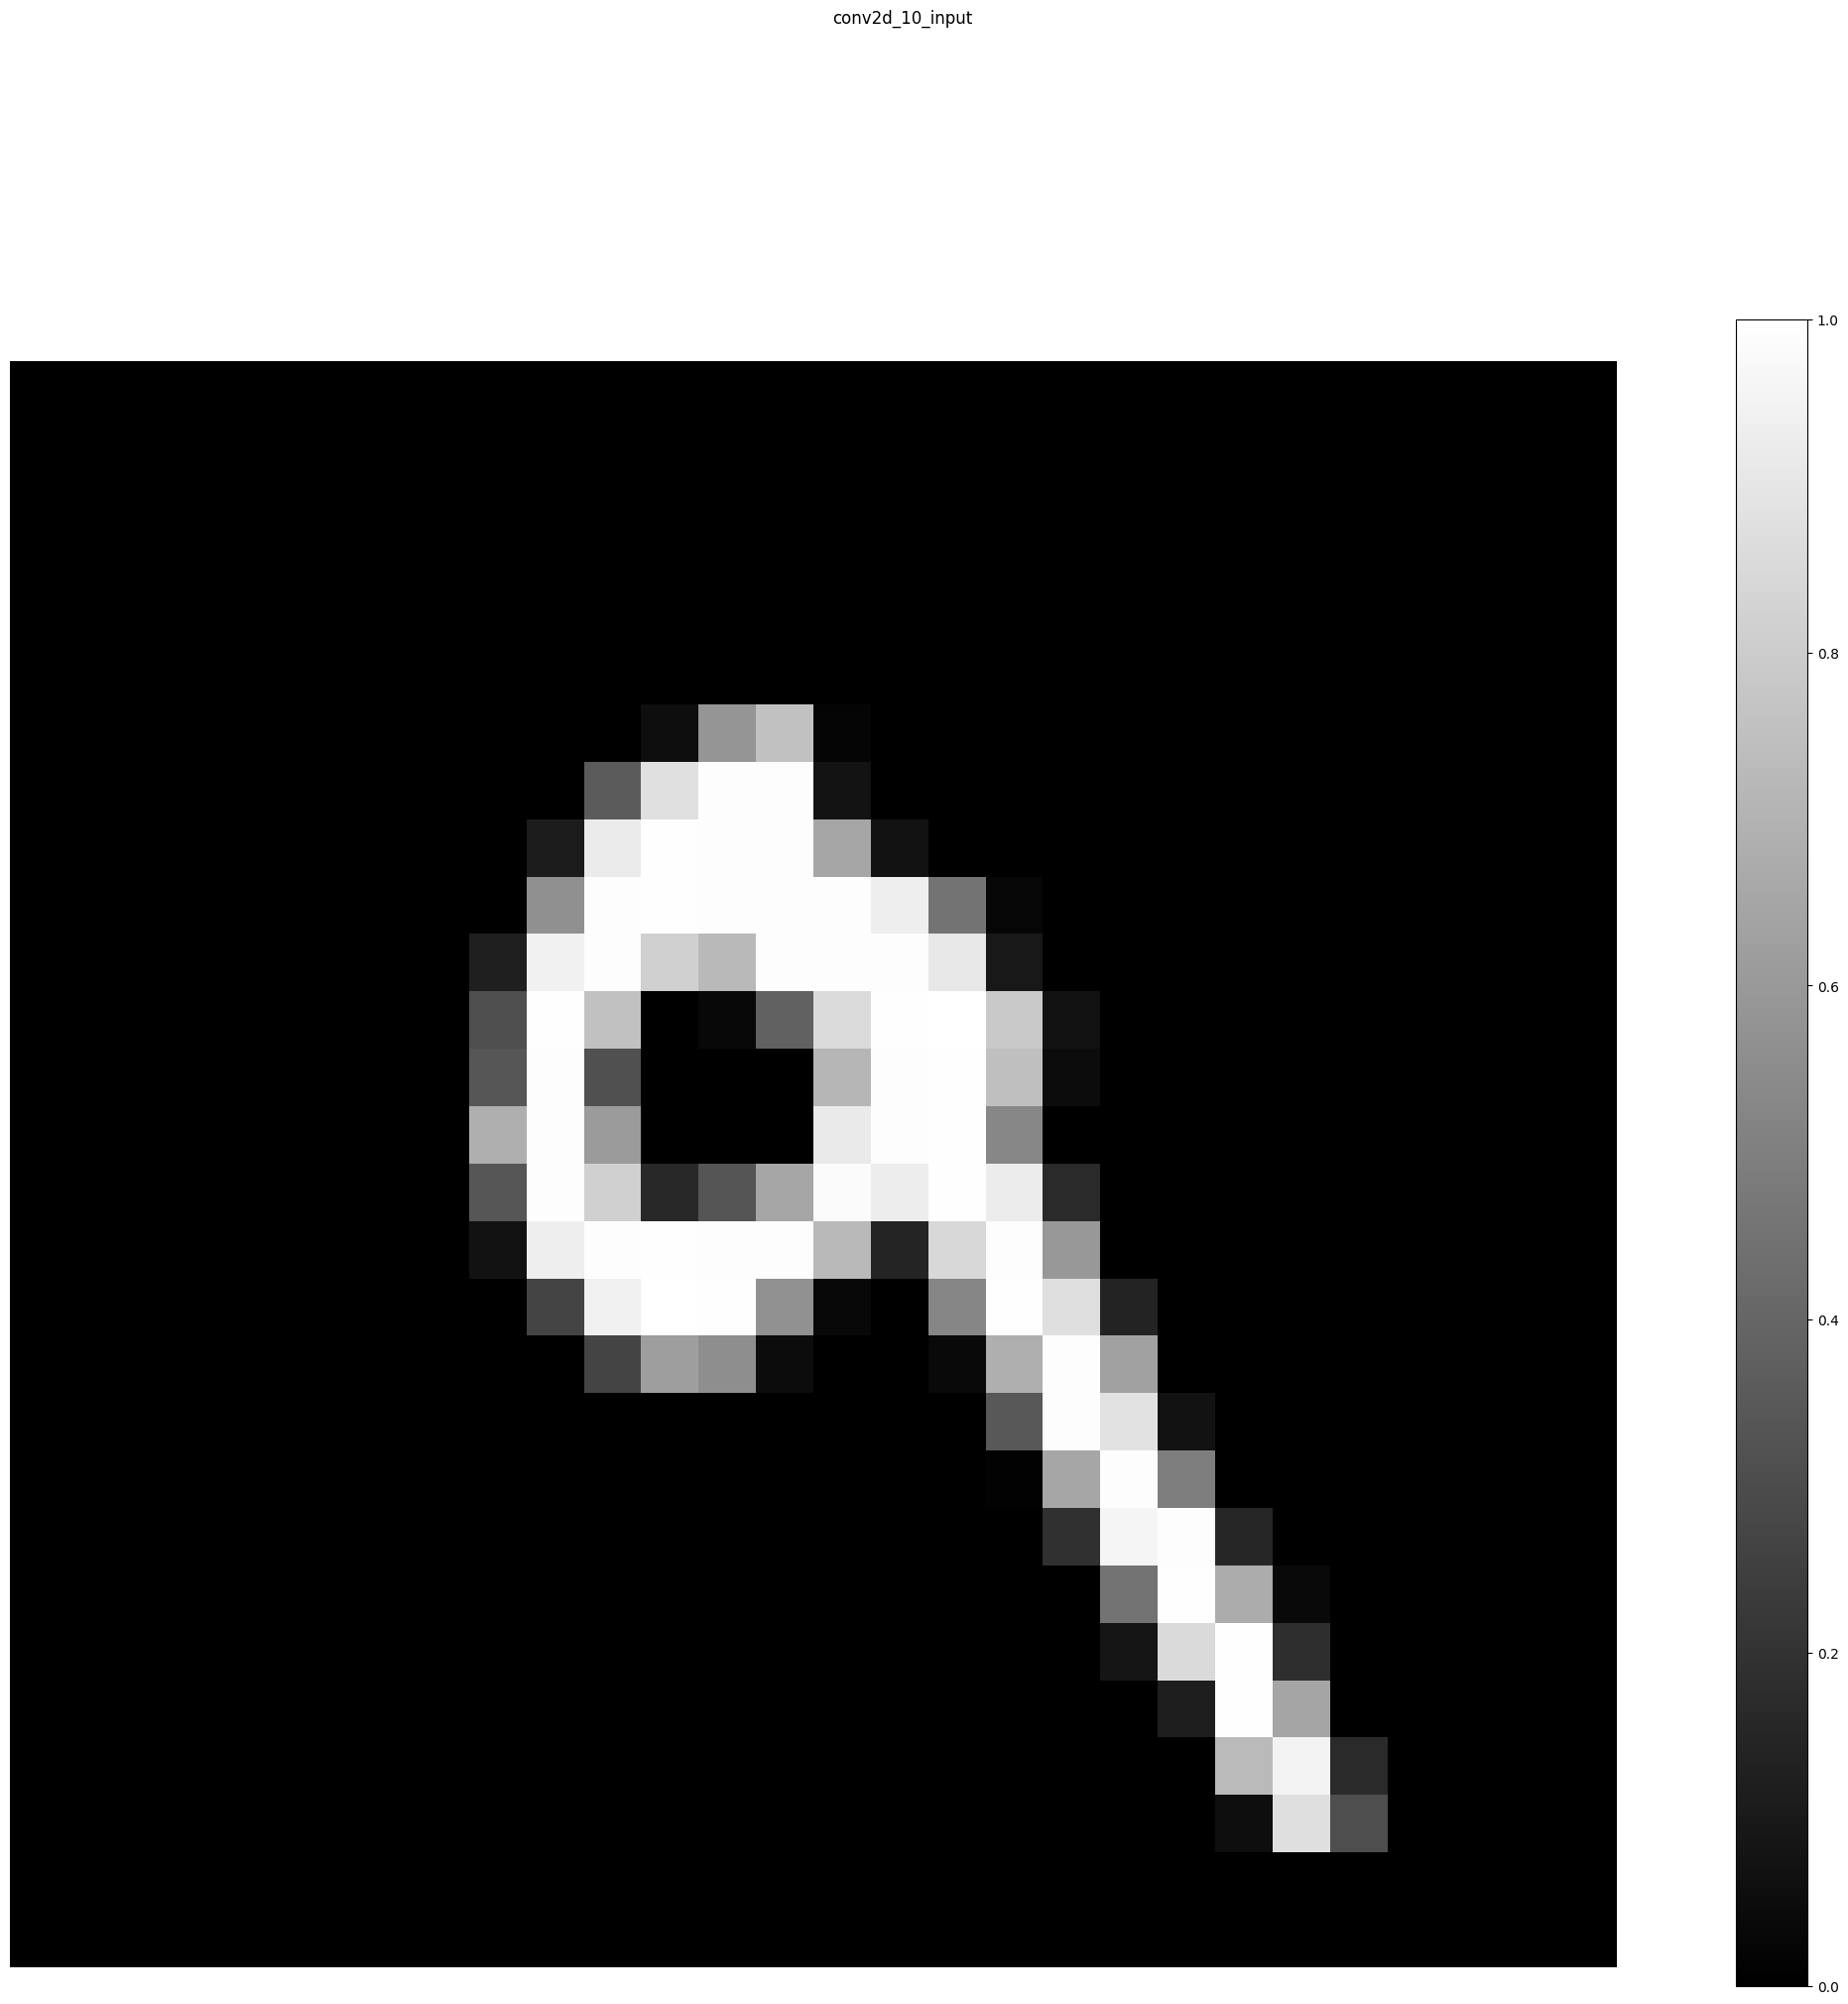

conv2d_10 (1, 28, 28, 2) 


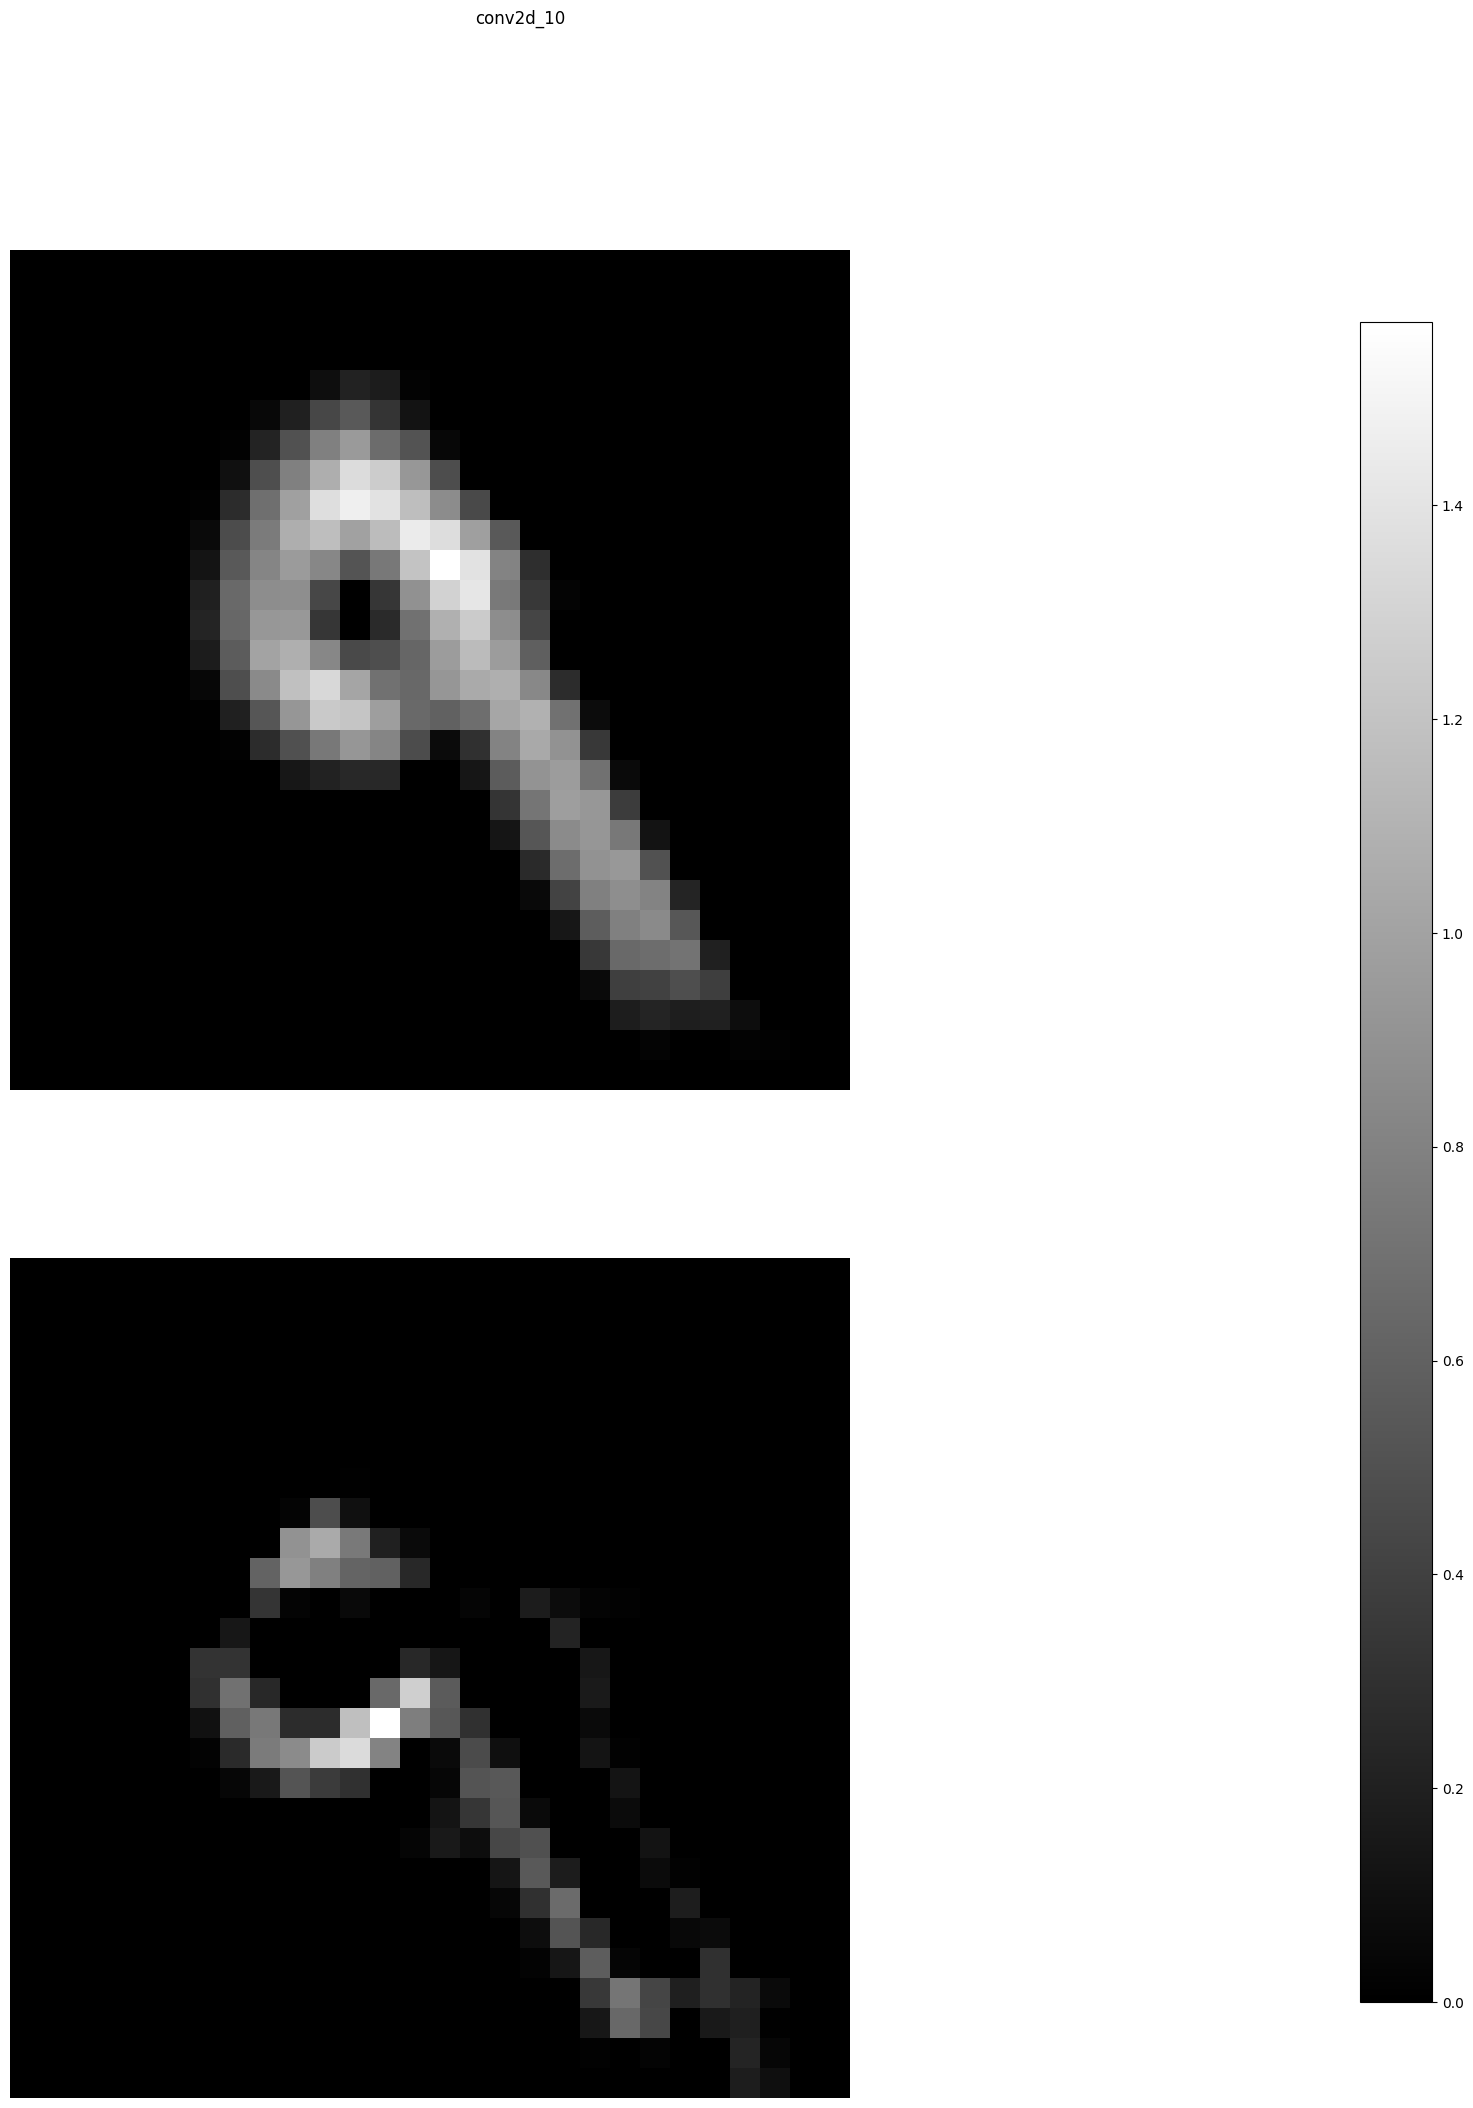

max_pooling2d_5 (1, 14, 14, 2) 


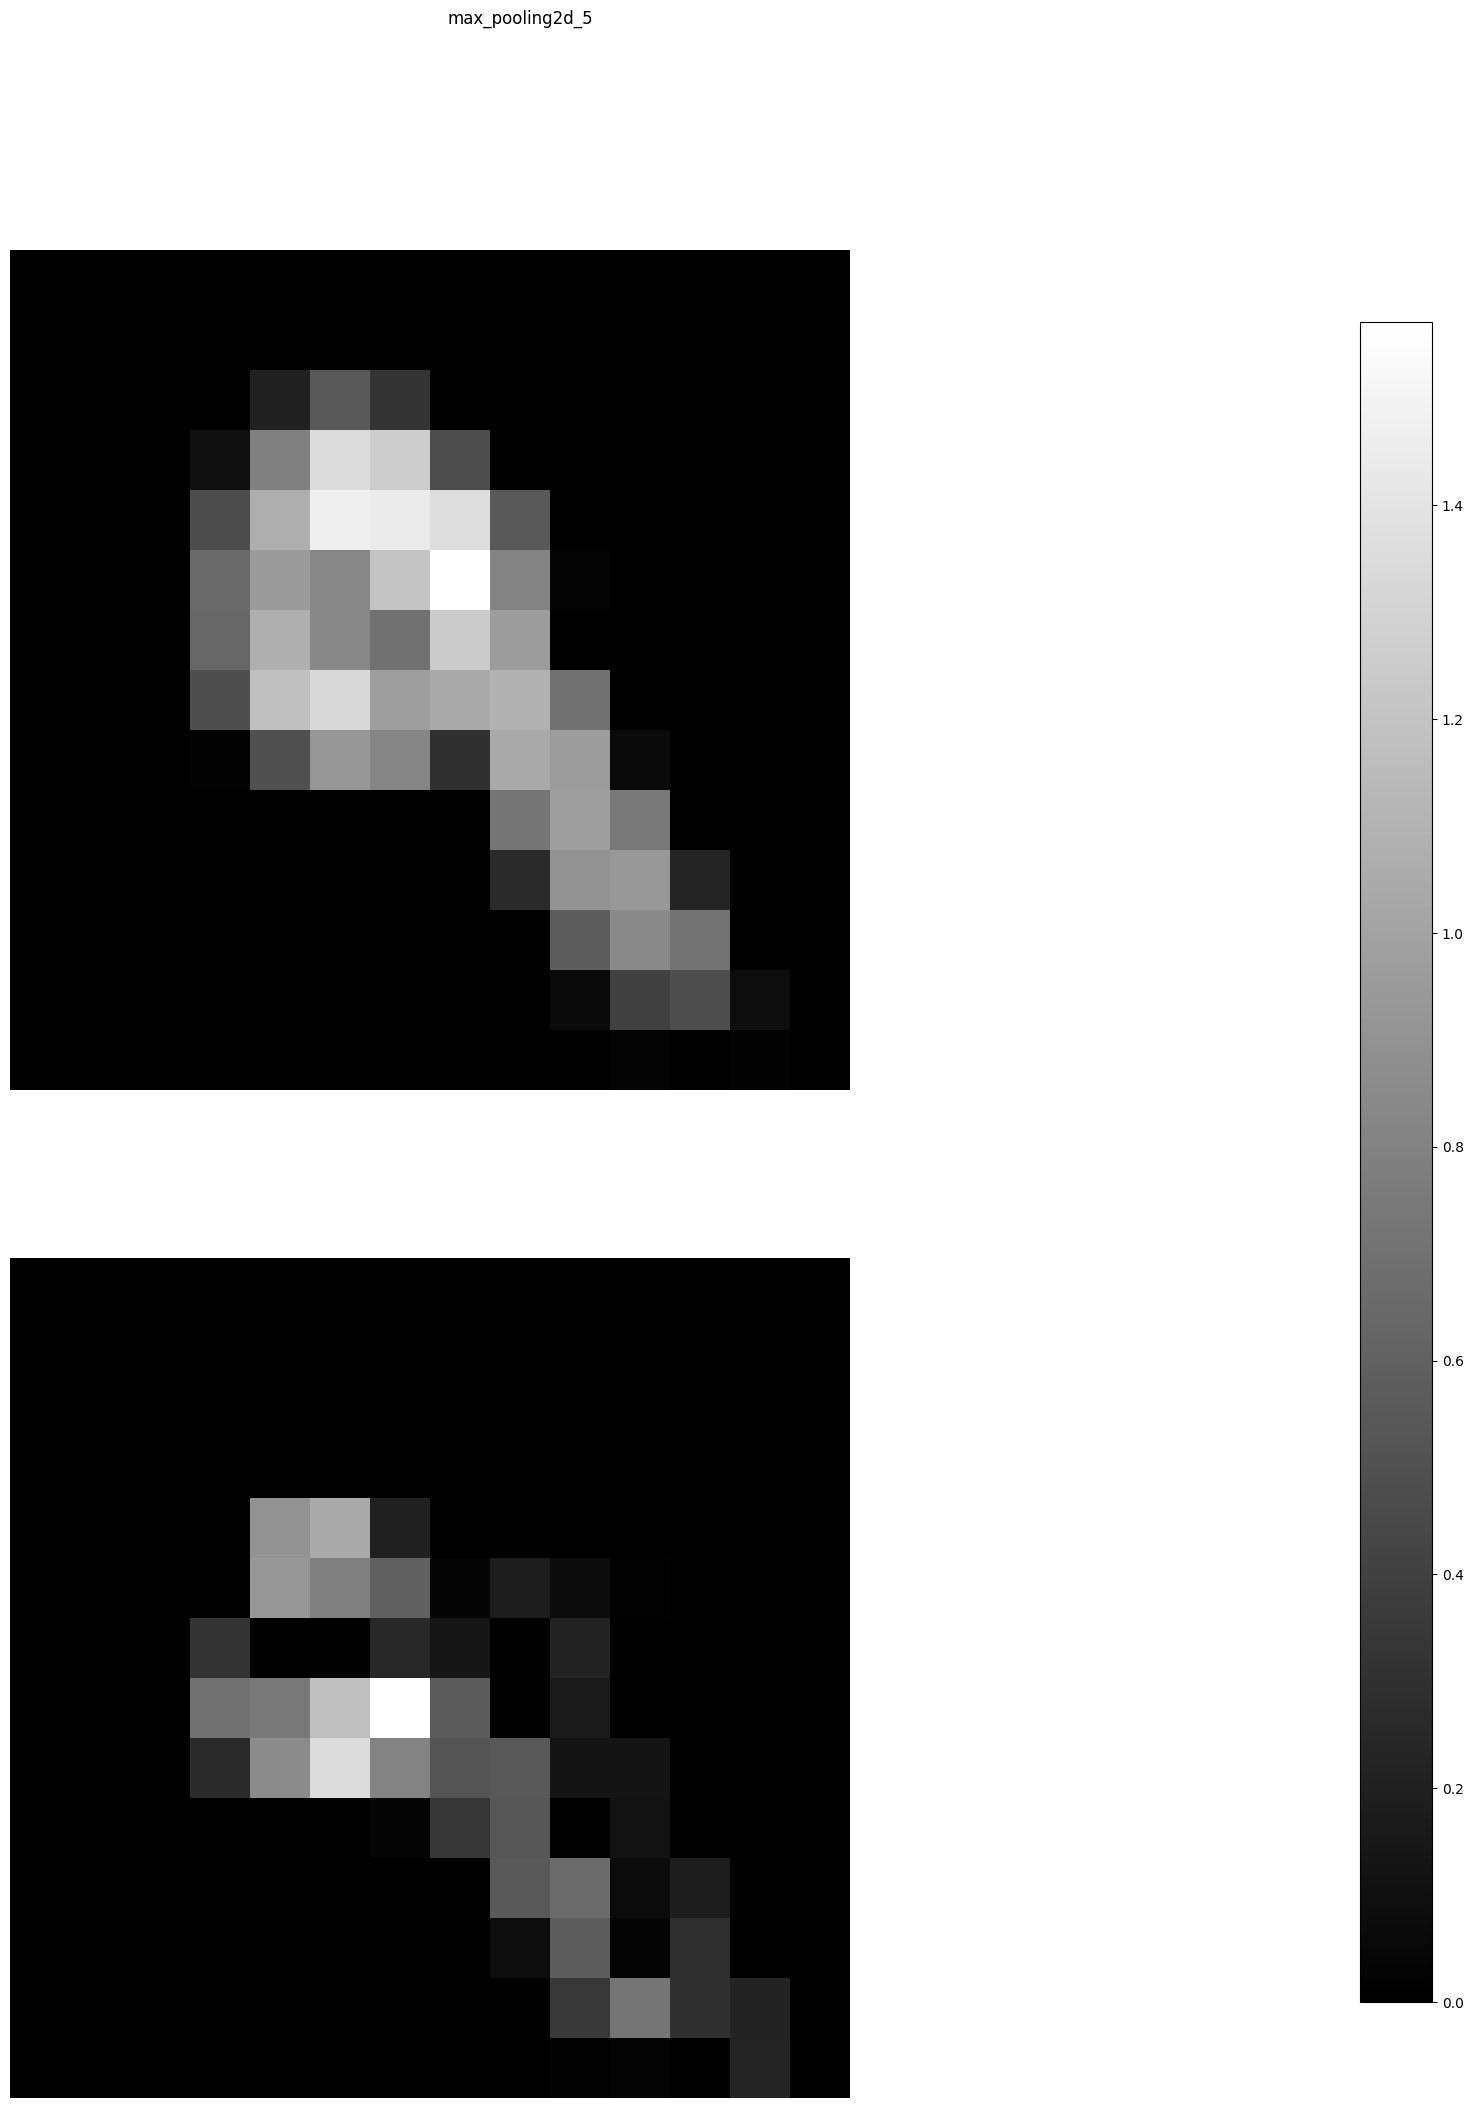

conv2d_11 (1, 14, 14, 10) 


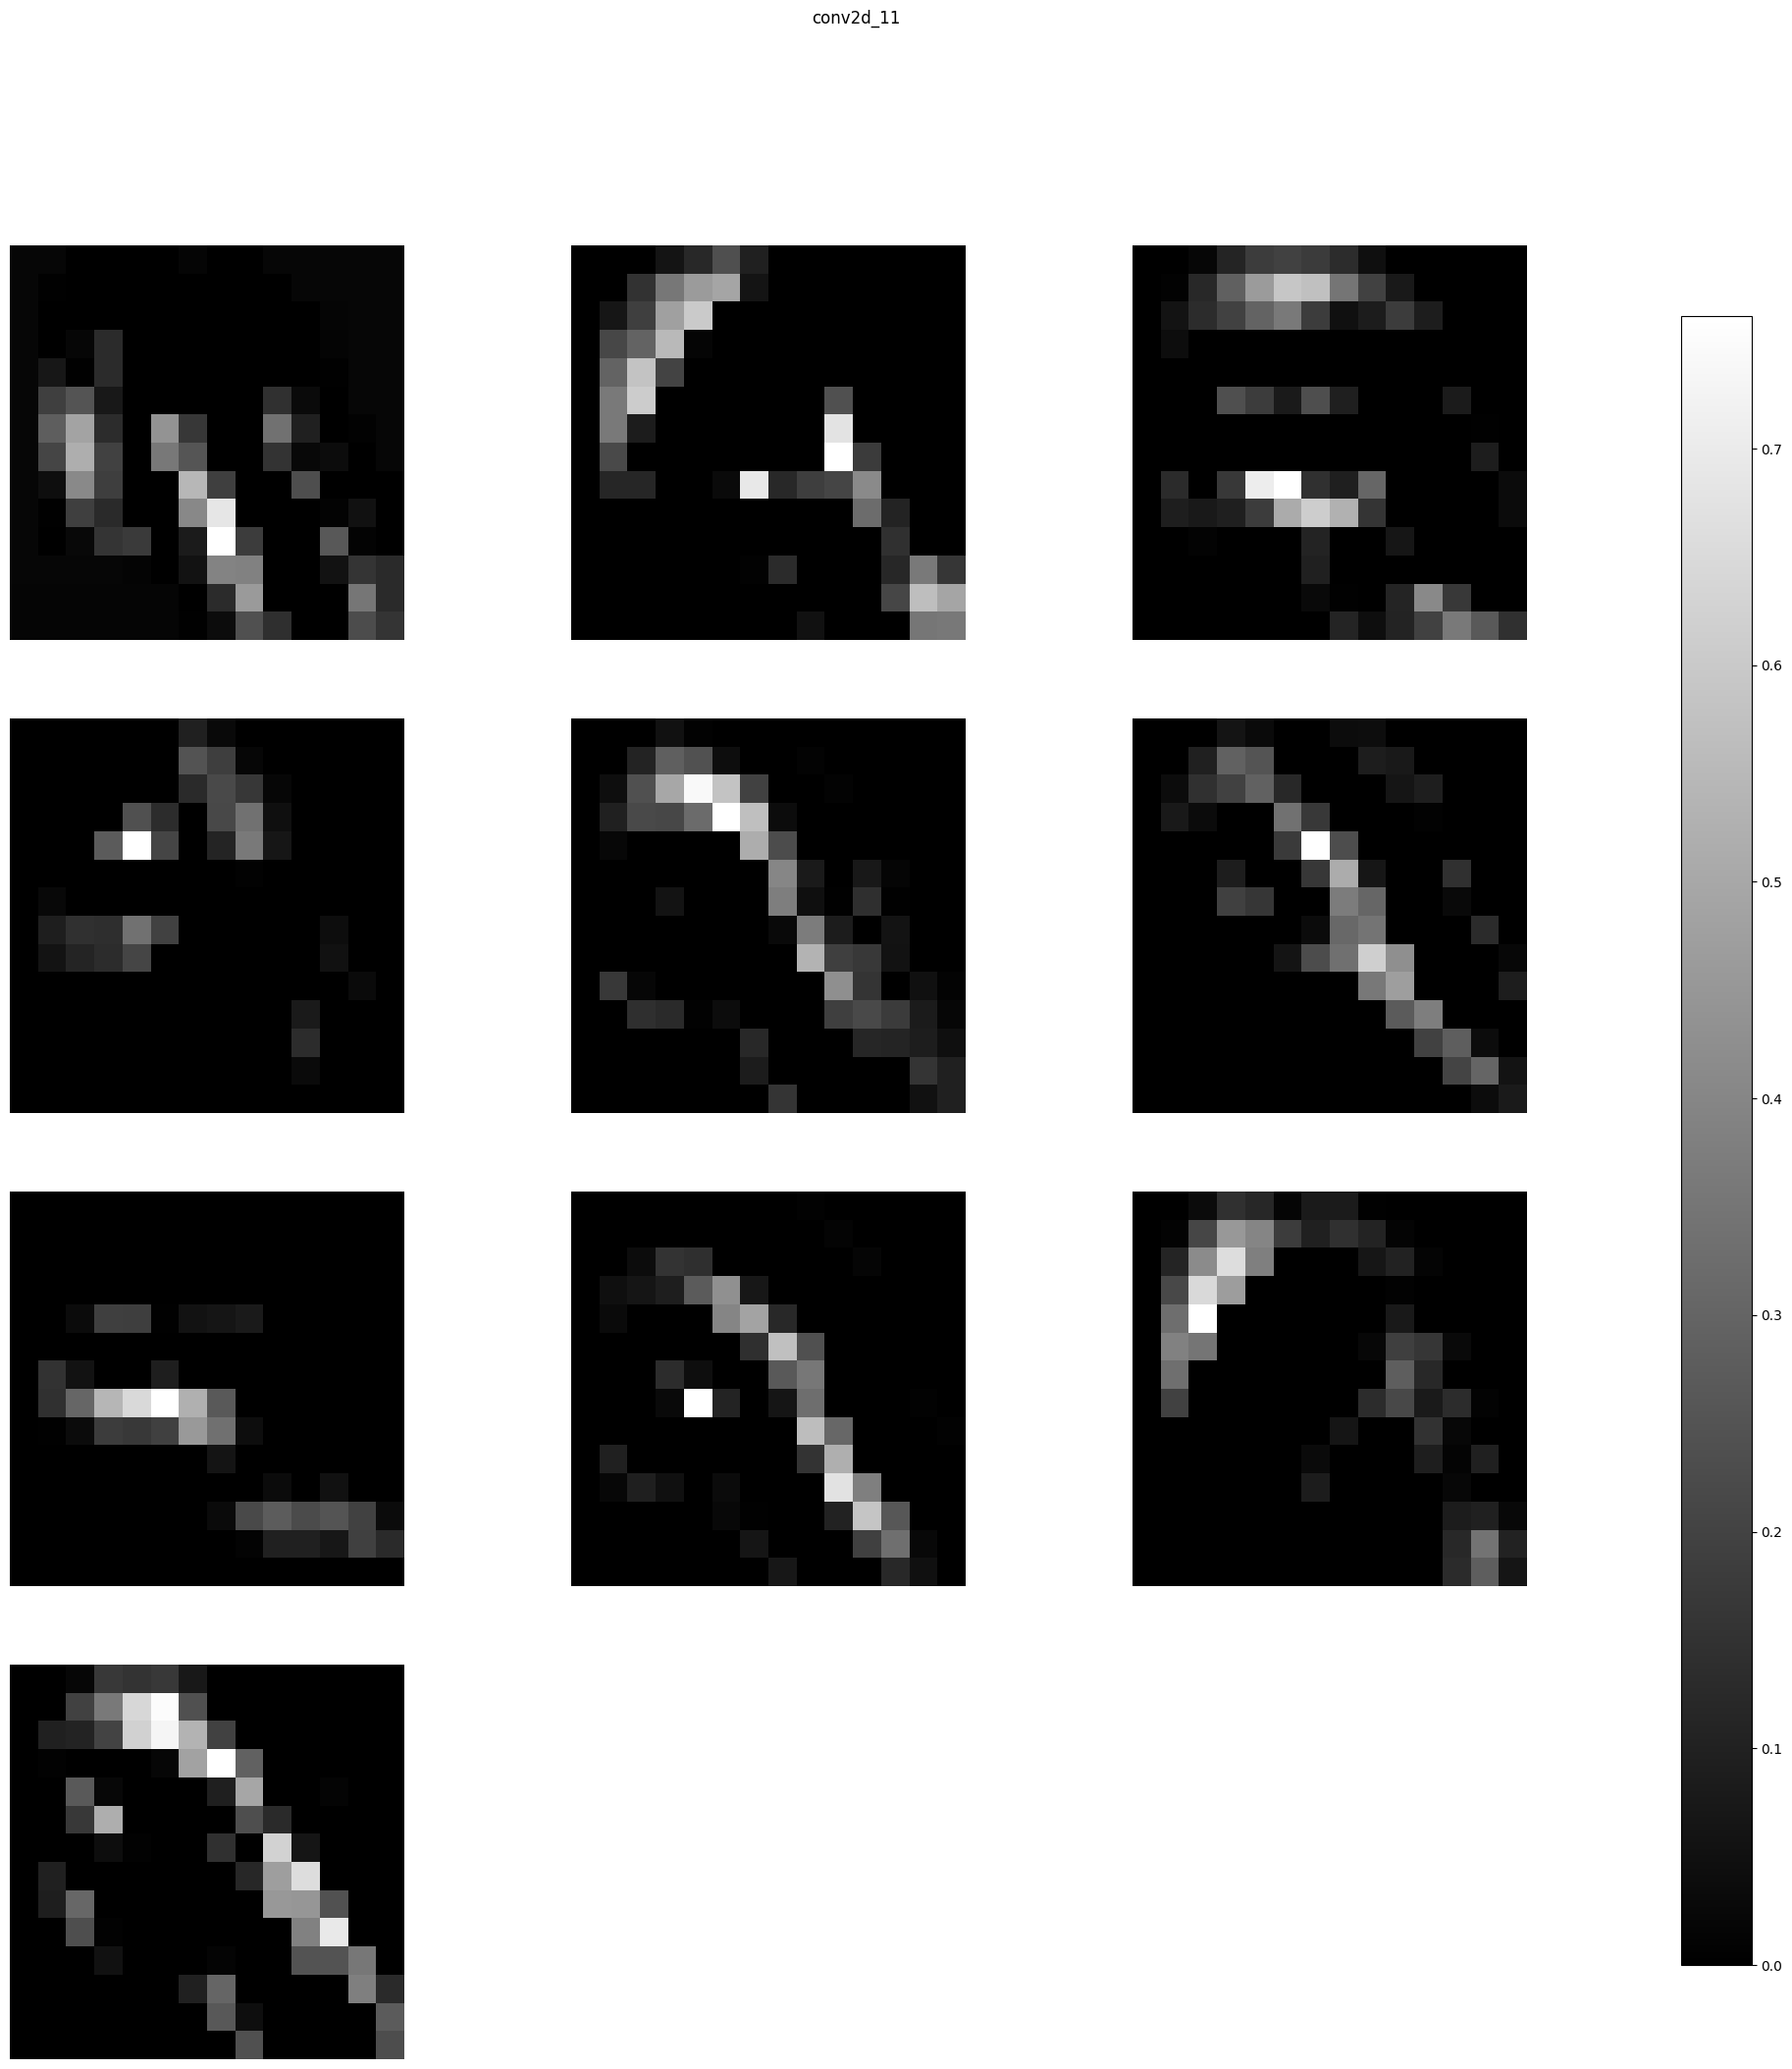

flatten_5 (1, 1960) 


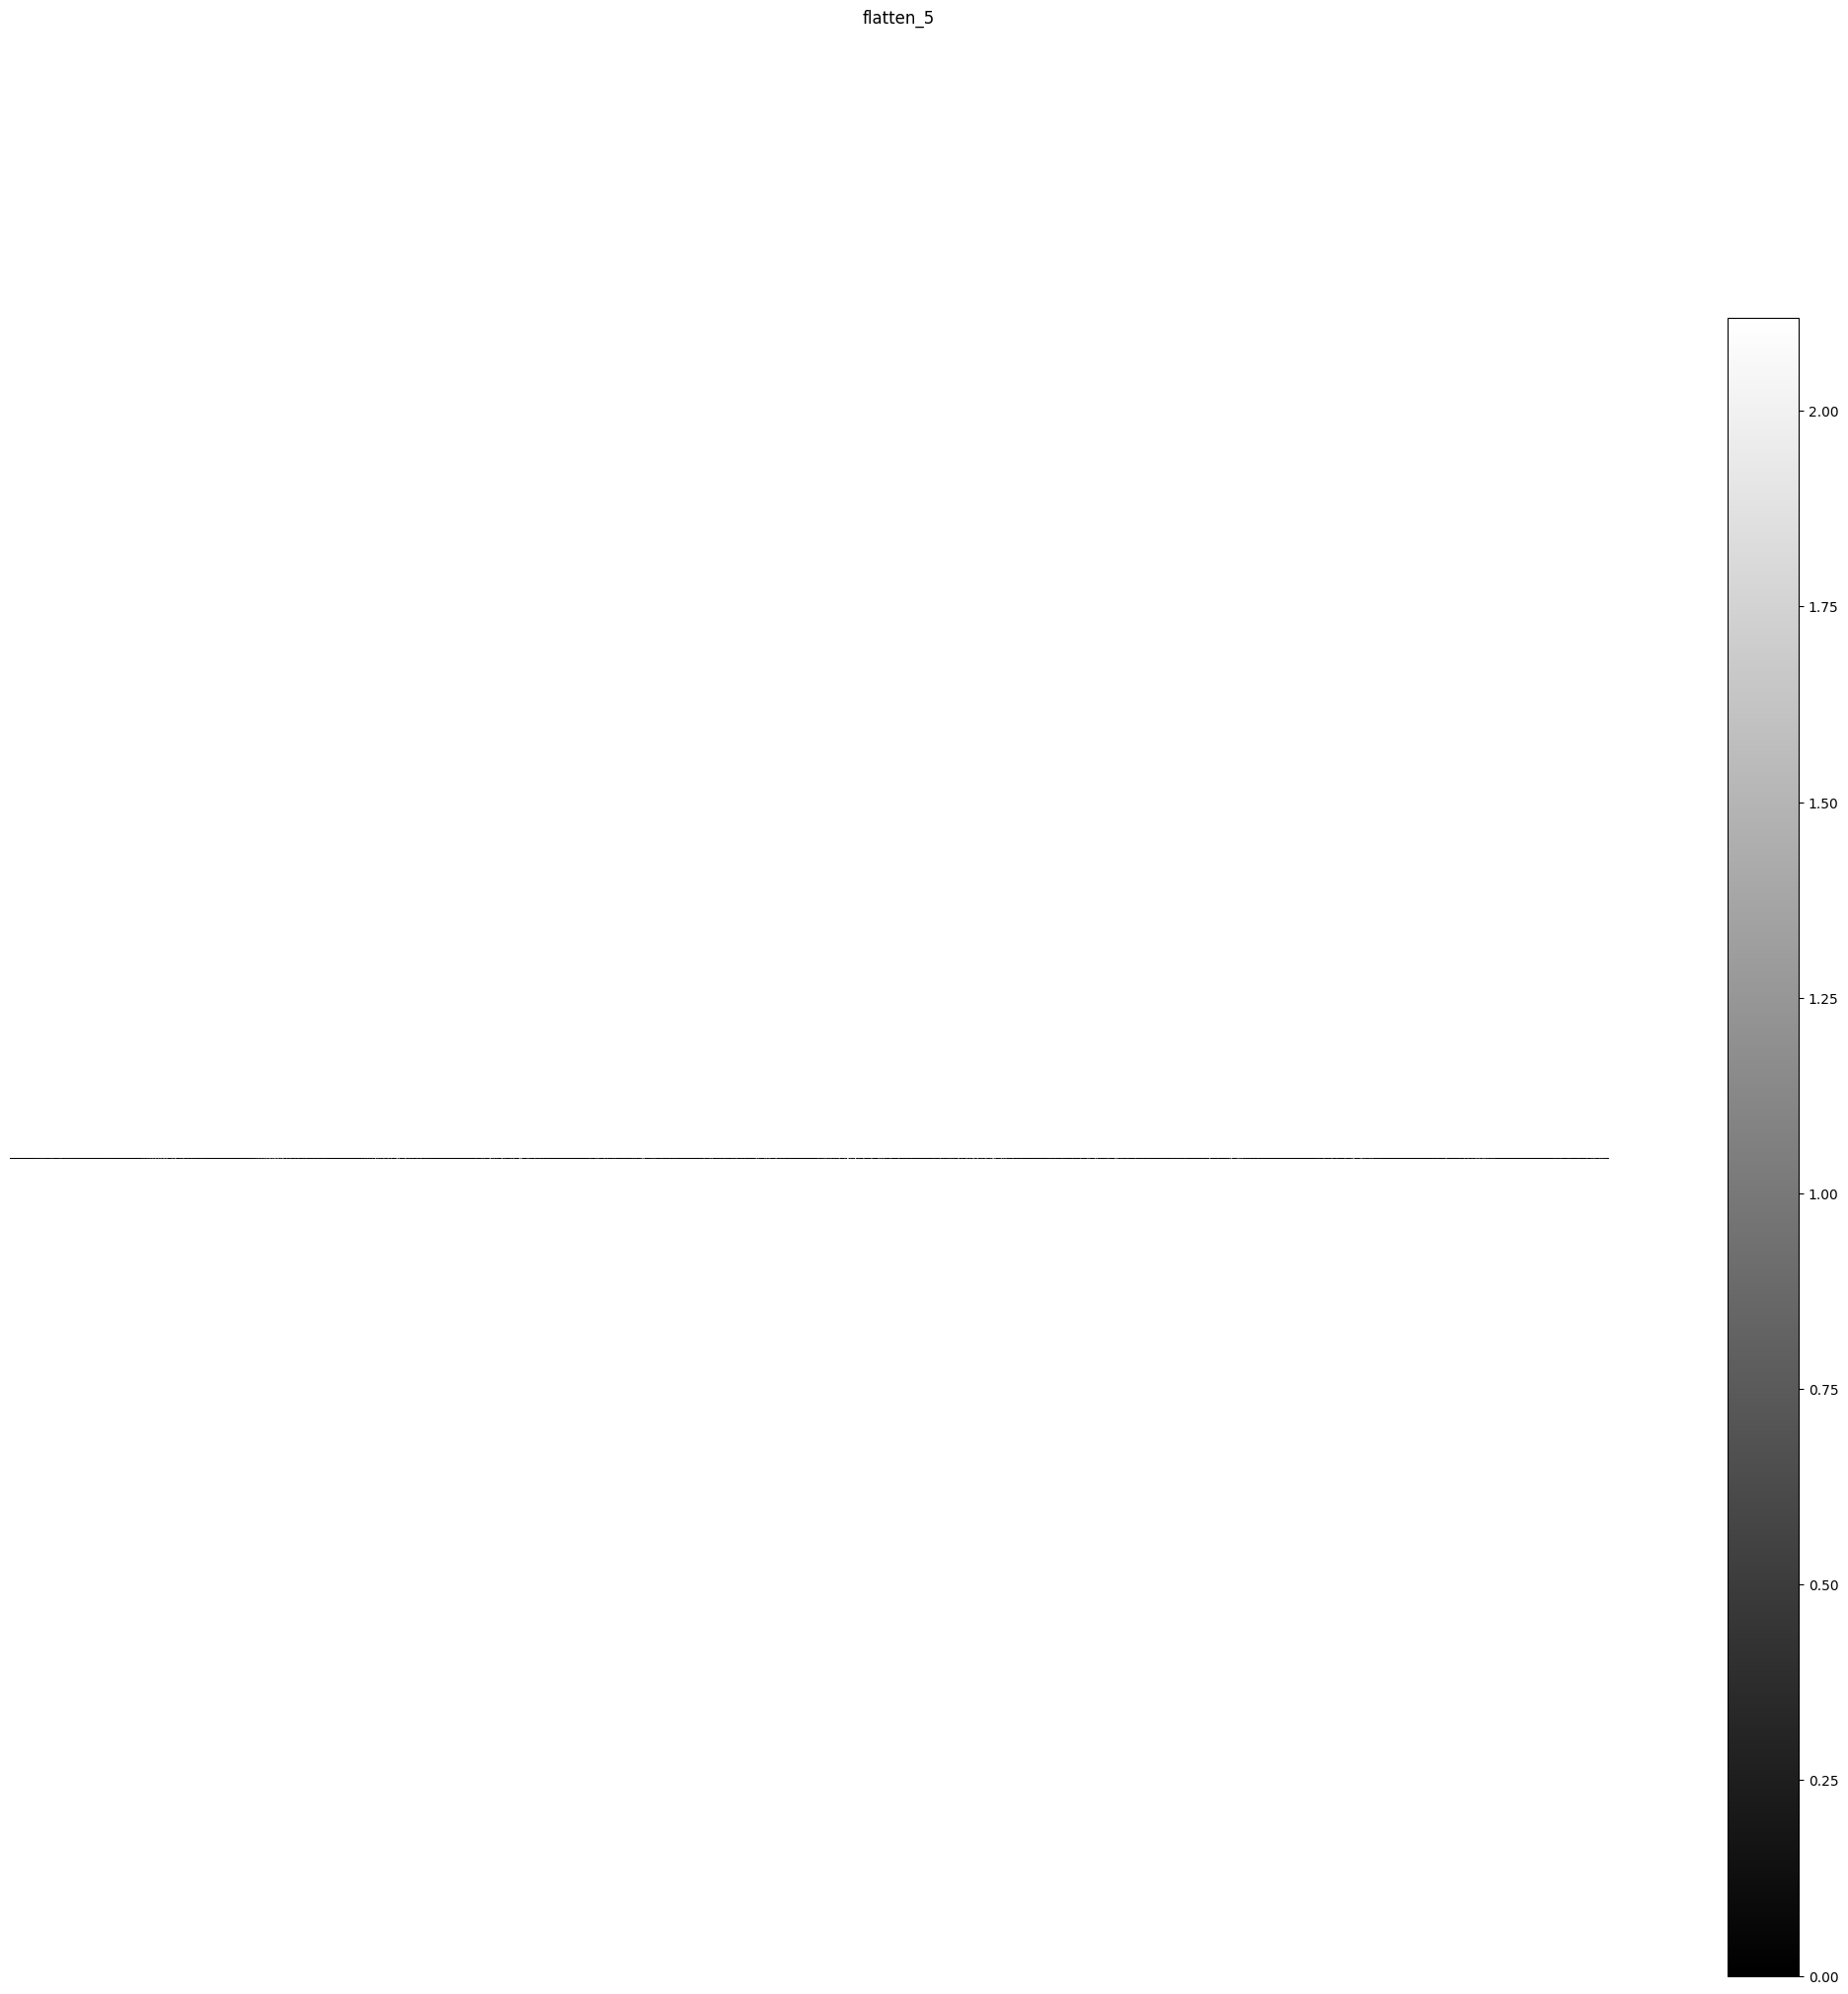

dense_10 (1, 256) 


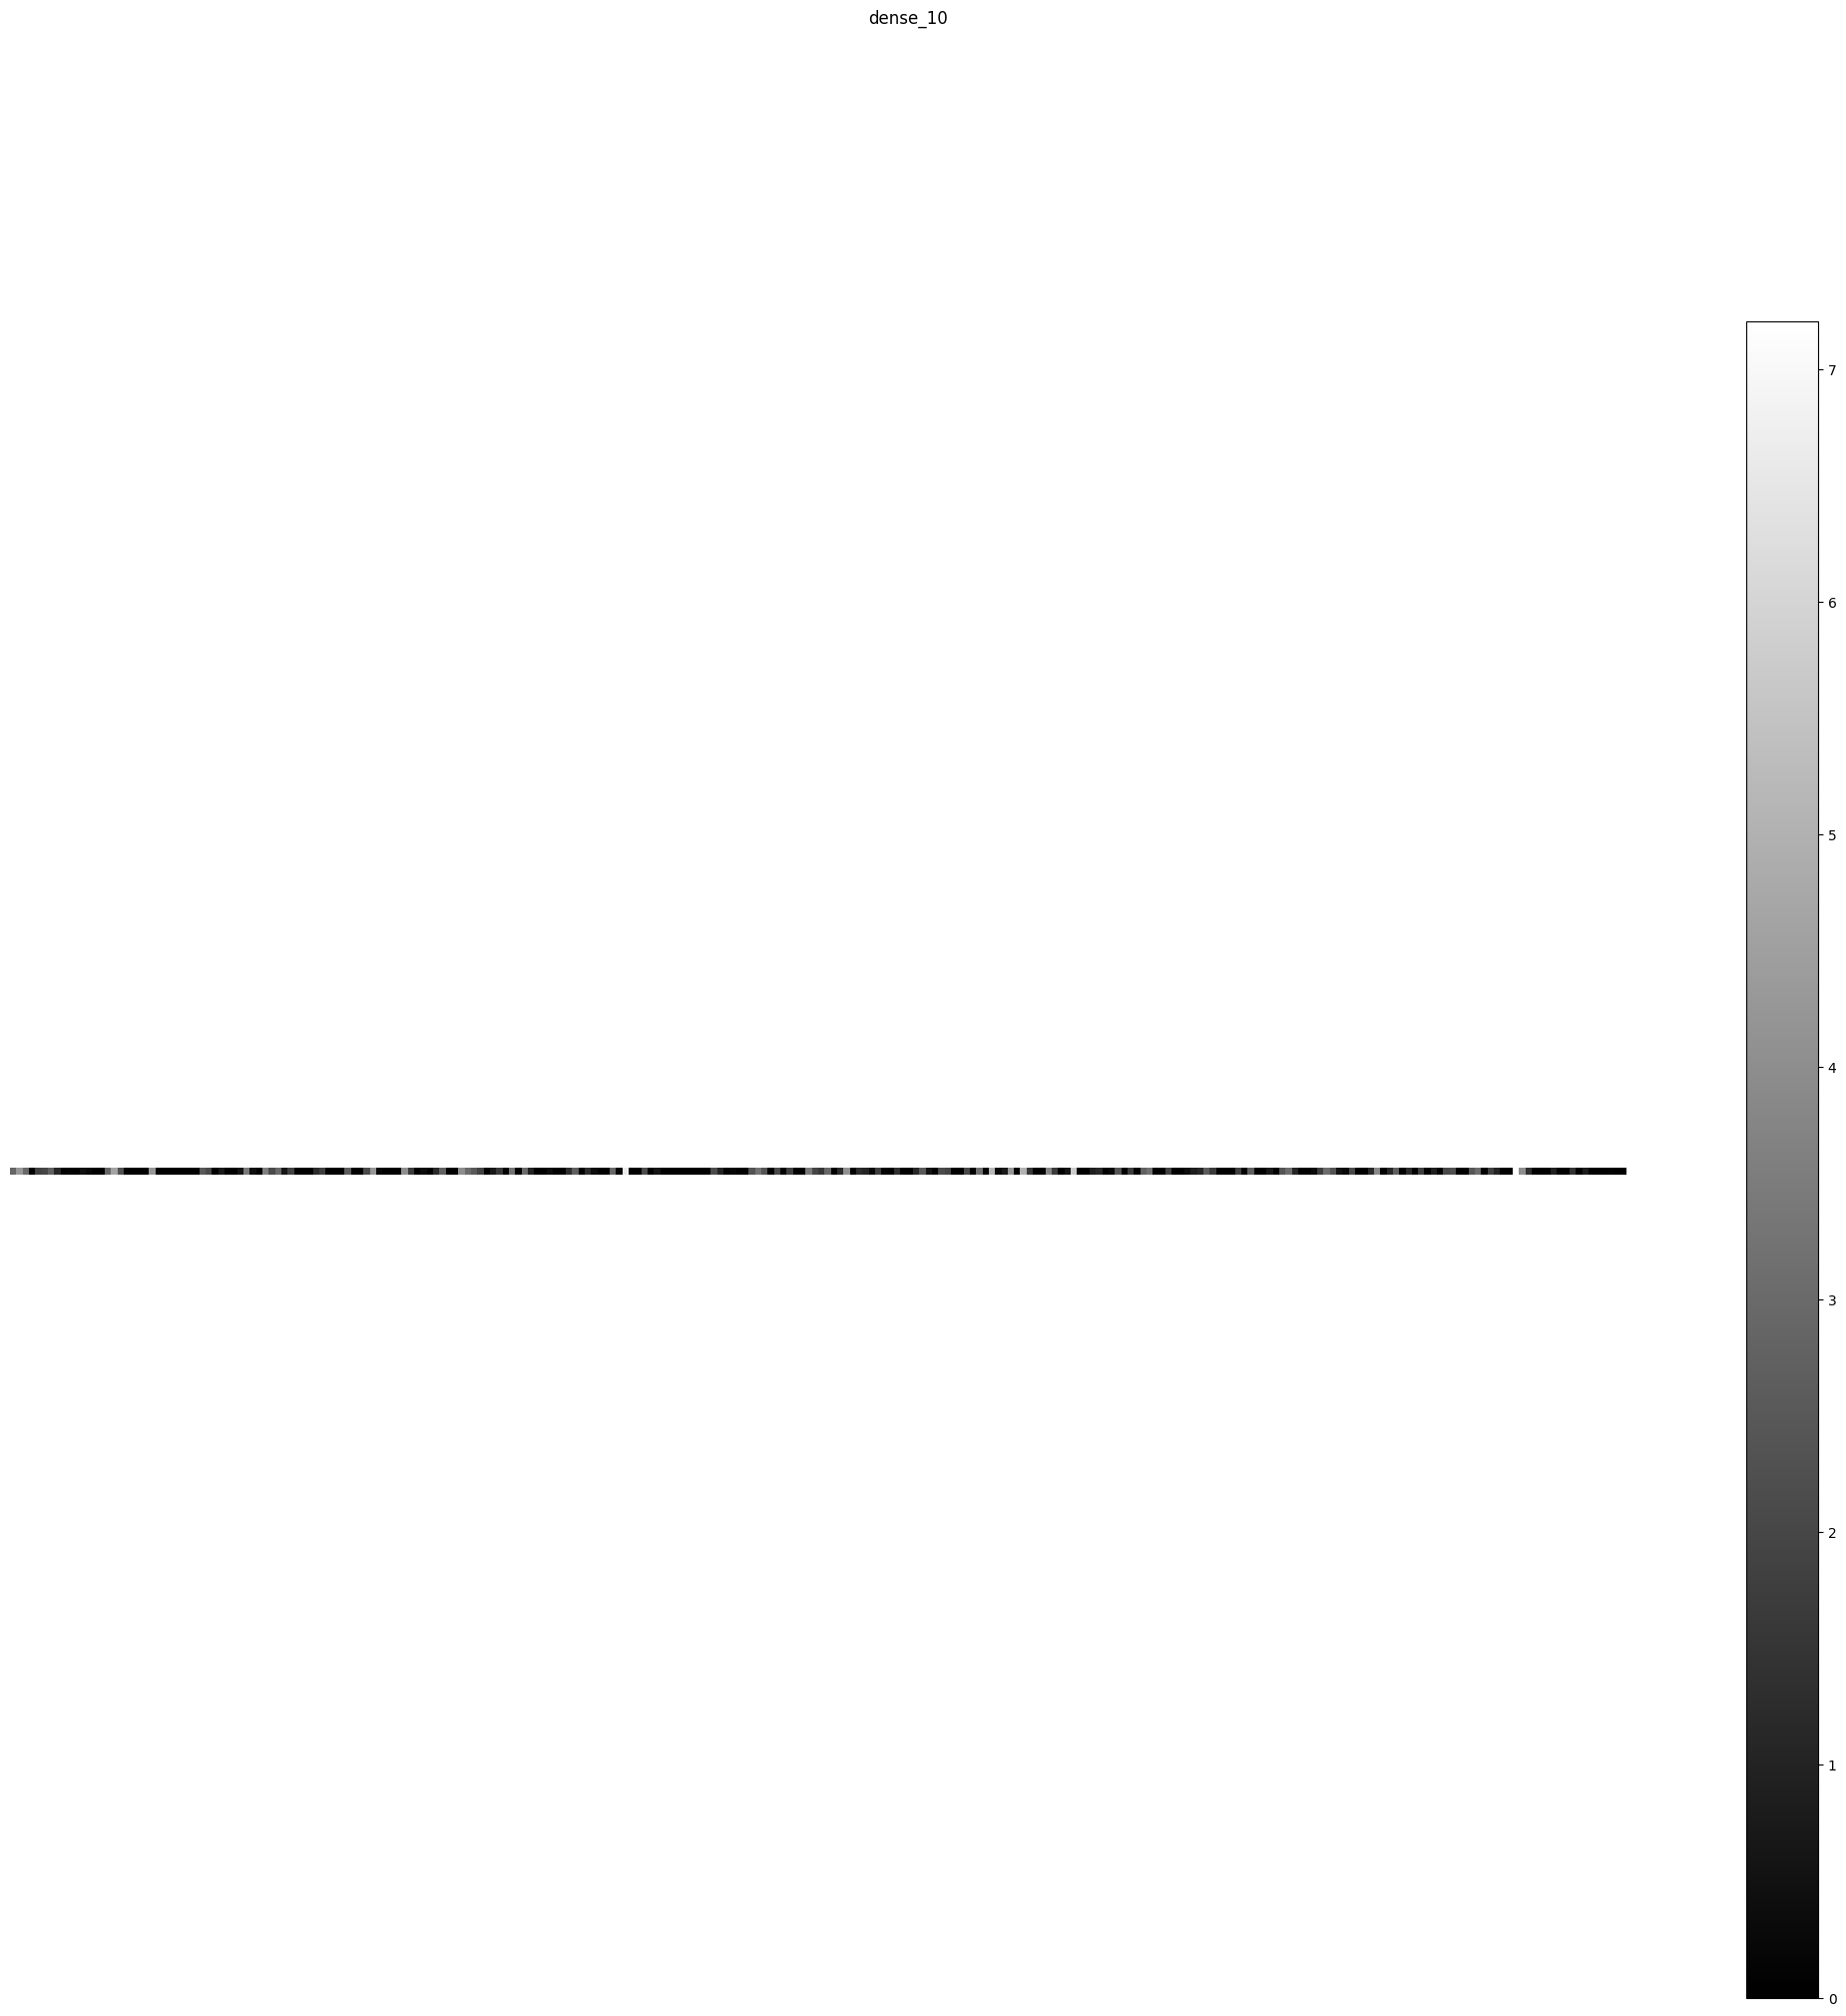

dense_11 (1, 10) 


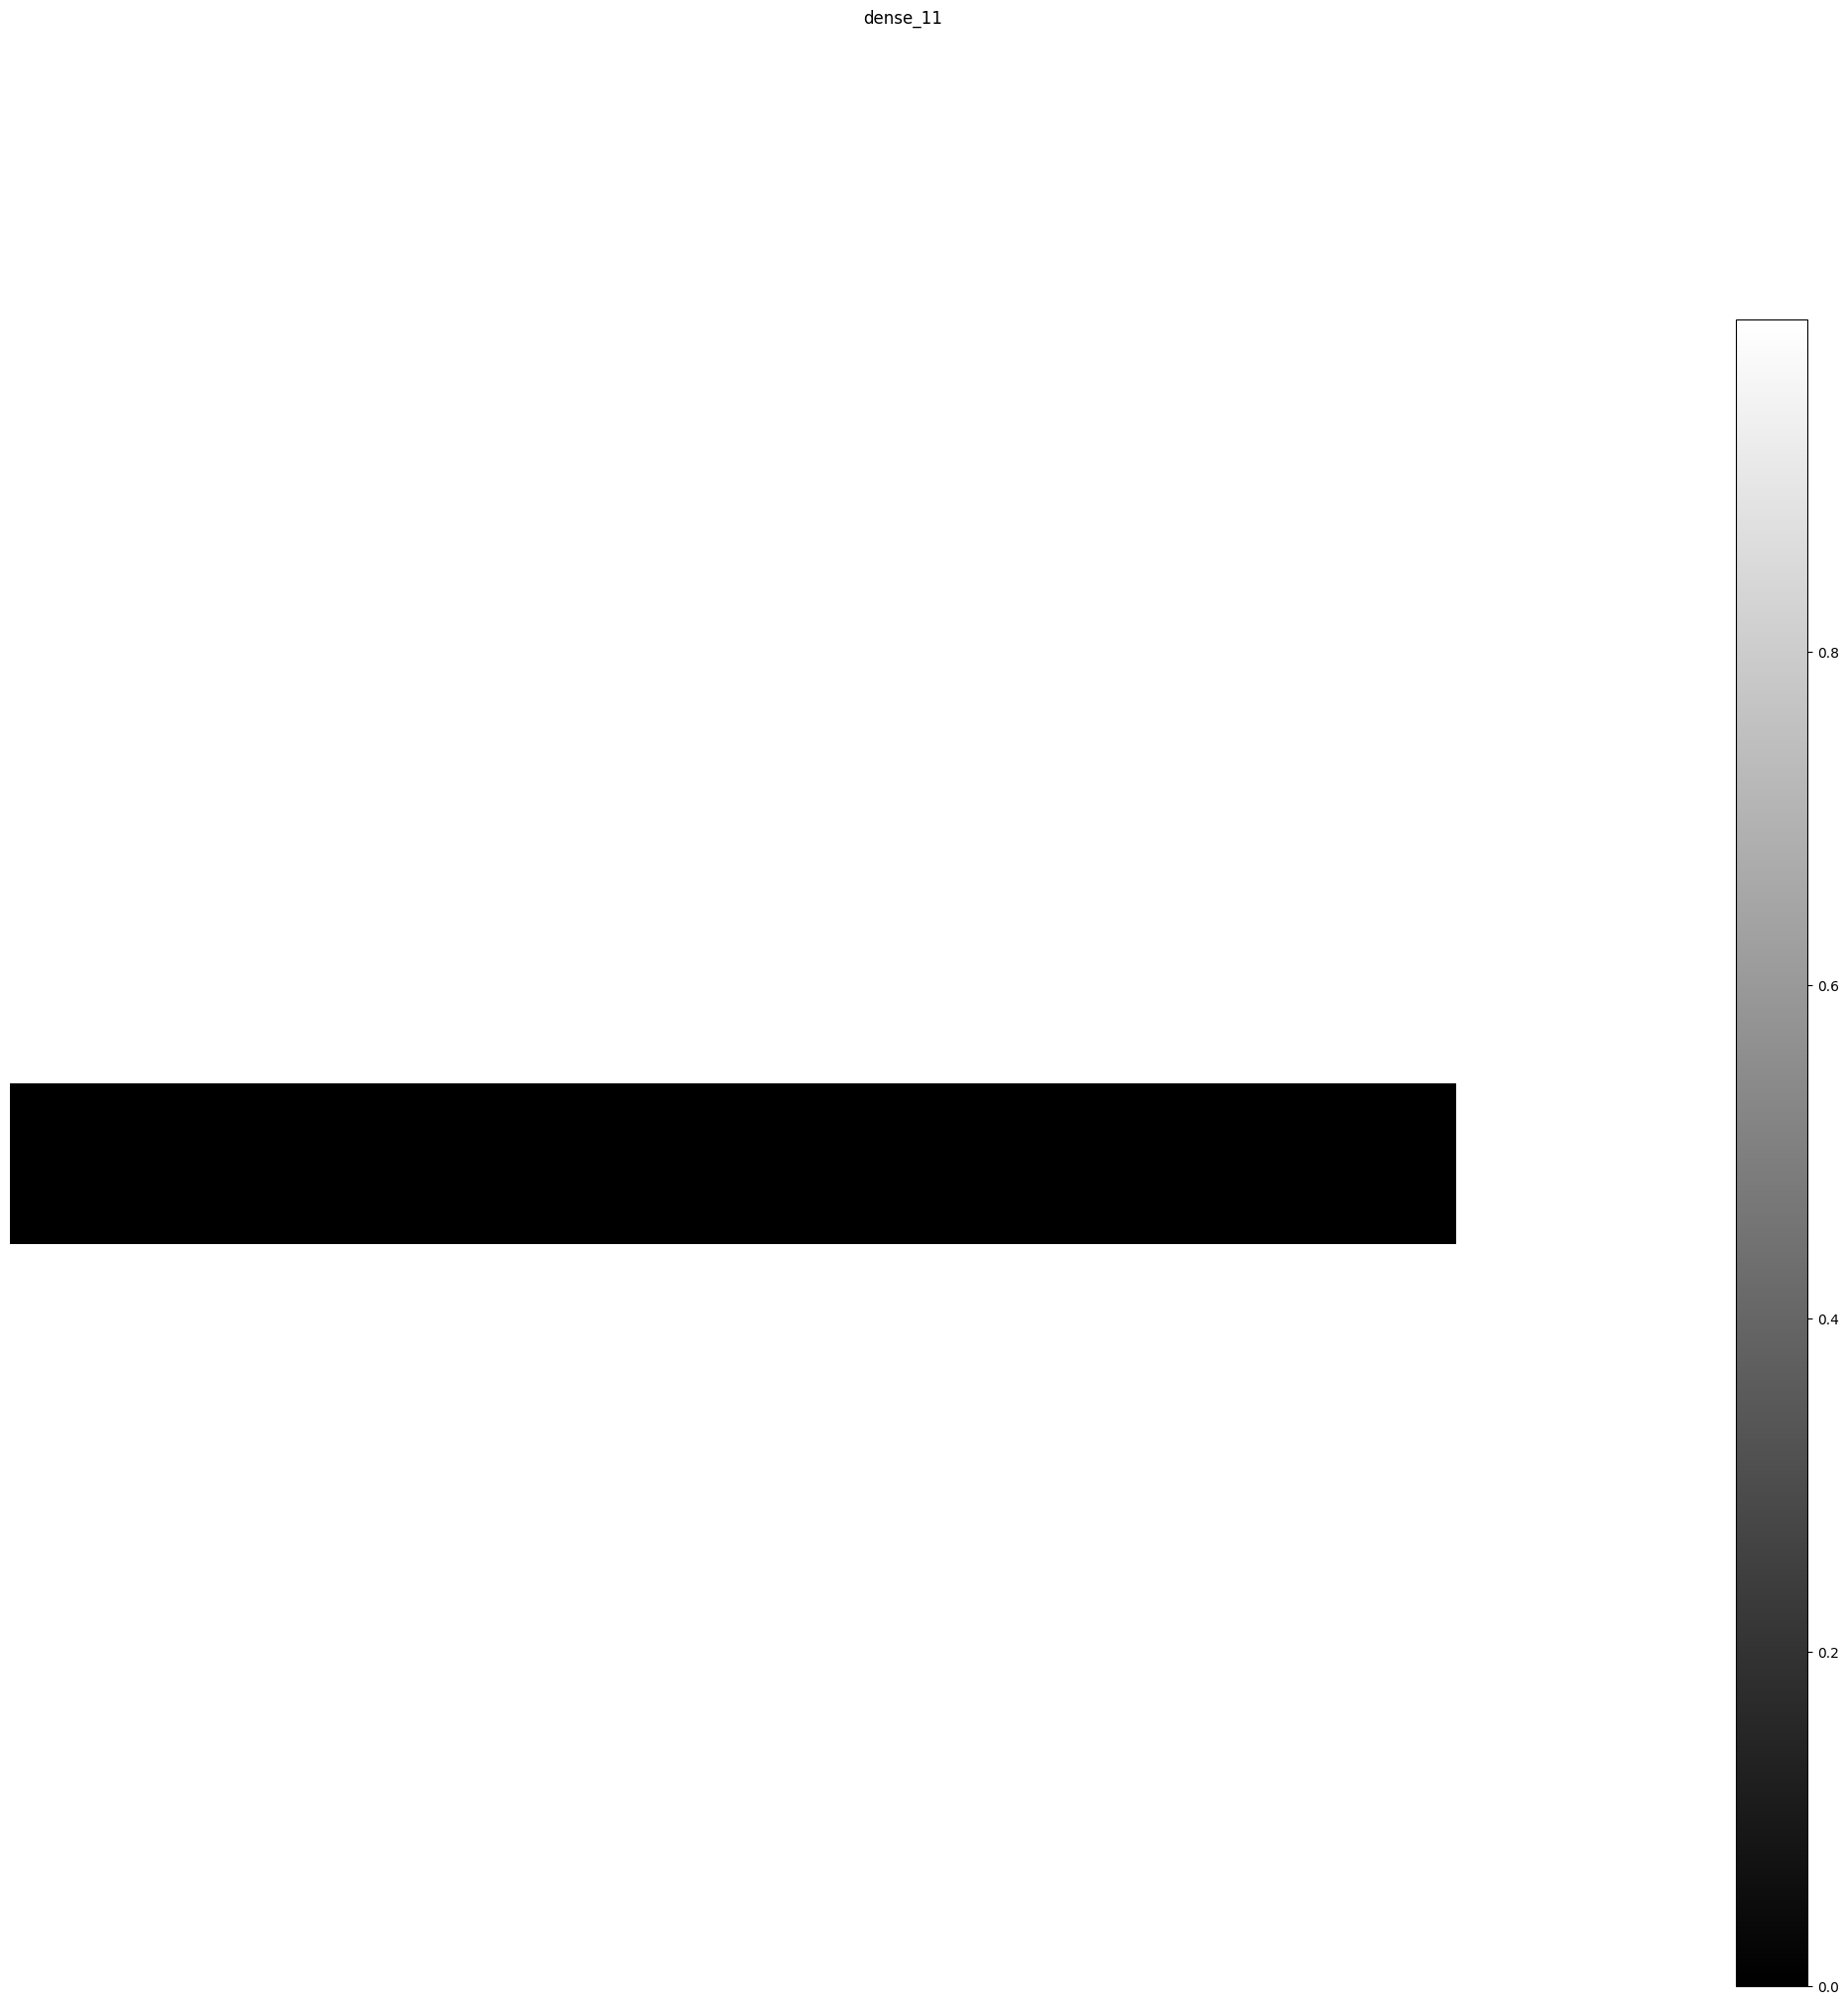

In [ ]:
# Визуализируем активации с помощью keract.
# С помощью array slicing выделяем первый элемент из массива. (Результат должен также быть массивом.)
inputs = input_test[7:8:1]
activations = get_activations(model, inputs)
display_activations(activations, cmap="gray", save=False)